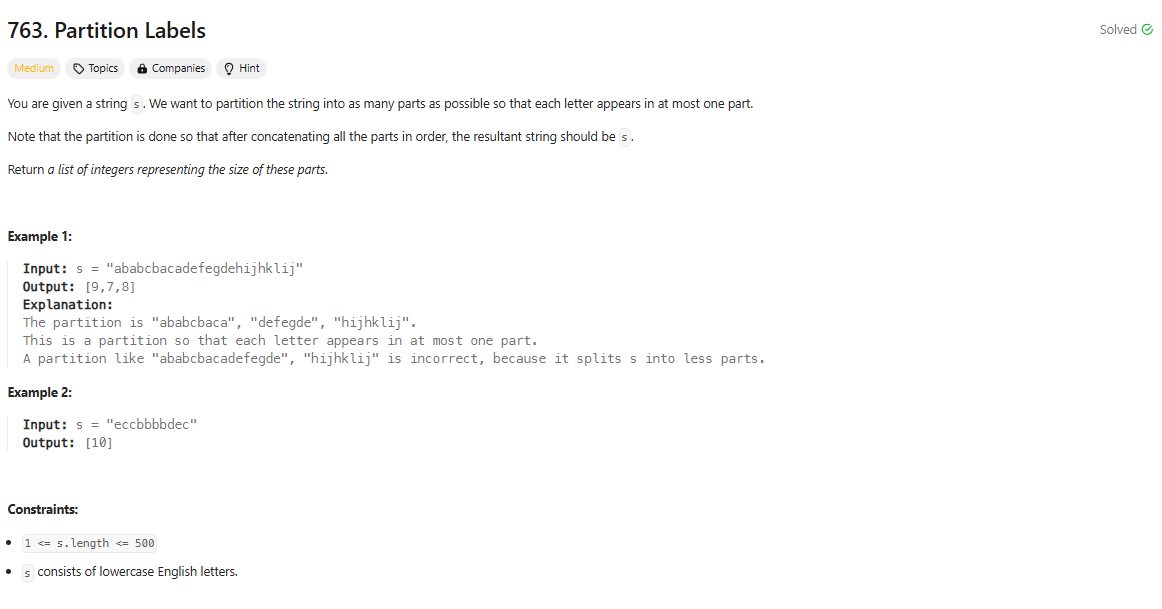

In [ ]:
# Solution 1 (For cleaner solution see solution 2)
# O(n)
class Solution:
    def partitionLabels(self, s: str) -> List[int]:
        firstOccurrence = {}
        intervals = []
        # If a char is new -> add its index
        # If a char has been seen before -> map it to the index of its first occurrence
        for idx, char in enumerate(s):
            if char not in firstOccurrence:
                firstOccurrence[char] = idx
            intervals.append((firstOccurrence[char], idx))
        
        # Solving merging intervals. They are sorted by end time (index).
        lastStart, lastEnd = intervals[-1]
        result = []

        for interval in reversed(intervals[:-1]):
            if interval[1] < lastStart:
                result.append(lastEnd - lastStart + 1)
                lastStart, lastEnd = interval
            else:
                lastStart = min(lastStart, interval[0])
        result.append(lastEnd - lastStart + 1)

        return list(reversed(result))

In [ ]:
# Solution 2
# O(n)
class Solution:
    def partitionLabels(self, s: str) -> List[int]:
        lastOccurrence = {}
        for i, char in enumerate(s):
            lastOccurrence[char] = i
        
        size = 0
        end = 0
        result = []
        for i, char in enumerate(s):
            size += 1
            end = max(end, lastOccurrence[char])
            if i == end:
                result.append(size)
                size = 0
        return result